In [1]:
# Sources used: https://machinelearningmastery.com/random-forest-ensemble-in-python/
# https://data36.com/random-forest-in-python/

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a Pandas dataframe
df = pd.read_csv("default_credit_cards.csv")

# Print the first few rows of the dataframe
print(df.head())


  Column1         X1   X2         X3        X4   X5     X6     X7     X8  \
0      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1       1      20000    2          2         1   24      2      2     -1   
2       2     120000    2          2         2   26     -1      2      0   
3       3      90000    2          2         2   34      0      0      0   
4       4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  


In [2]:
# Convert to pandas df

df = pd.DataFrame(df)


In [3]:
# Taje a glance at the dataset using df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  30001 non-null  object
 1   X1       30001 non-null  object
 2   X2       30001 non-null  object
 3   X3       30001 non-null  object
 4   X4       30001 non-null  object
 5   X5       30001 non-null  object
 6   X6       30001 non-null  object
 7   X7       30001 non-null  object
 8   X8       30001 non-null  object
 9   X9       30001 non-null  object
 10  X10      30001 non-null  object
 11  X11      30001 non-null  object
 12  X12      30001 non-null  object
 13  X13      30001 non-null  object
 14  X14      30001 non-null  object
 15  X15      30001 non-null  object
 16  X16      30001 non-null  object
 17  X17      30001 non-null  object
 18  X18      30001 non-null  object
 19  X19      30001 non-null  object
 20  X20      30001 non-null  object
 21  X21      30001 non-null  object
 22

In [5]:
# See the last 5 rows of the df

df.tail()

,Column1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# I need to remove heading from the df

df = df.drop(df.index[0])

df.head()


,Column1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# rename columns

# Create a mapping of the old column names to the new column names

column_mapping = {
    "Column1": "id",
    "X1": "balance_limit",
    "X2": "gender",
    "X3": "educ_level",
    "X4": "marital_status",
    "X5": "age",
    "X6": "repymt_status_09/05",
    "X7": "repymt_status_08/05",
    "X8": "repymt_status_07/05",
    "X9": "repymt_status_06/05",
    "X10": "repymt_status_05/05",
    "X11": "repayment_status_04/05",
    "X12": "bill_amnt_09/05",
    "X13": "bill_amnt_08/05",
    "X14": "bill_amnt_07/05",
    "X15": "bill_amnt_06/05",
    "X16": "bill_amnt_05/05",
    "X17": "bill_amnt_04/05",
    "X18": "pay_amnt_09/05",
    "X19": "pay_amnt_08/05",
    "X20": "pay_amnt_07/05",
    "X21": "pay_amnt_06/05",
    "X22": "pay_amnt_05/05",
    "X23": "pay_amnt_04/05",
    "Y": "default"
}

# Rename the columns using the mapping
df = df.rename(columns=column_mapping)
df.head()


,id,balance_limit,gender,educ_level,marital_status,age,repymt_status_09/05,repymt_status_08/05,repymt_status_07/05,repymt_status_06/05,...,bill_amnt_06/05,bill_amnt_05/05,bill_amnt_04/05,pay_amnt_09/05,pay_amnt_08/05,pay_amnt_07/05,pay_amnt_06/05,pay_amnt_05/05,pay_amnt_04/05,default
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Iterate through each column in the dataframe

for col in df.columns:
    df[col] = df[col].astype(int)

print(df.dtypes)


id                        int32
balance_limit             int32
gender                    int32
educ_level                int32
marital_status            int32
age                       int32
repymt_status_09/05       int32
repymt_status_08/05       int32
repymt_status_07/05       int32
repymt_status_06/05       int32
repymt_status_05/05       int32
repayment_status_04/05    int32
bill_amnt_09/05           int32
bill_amnt_08/05           int32
bill_amnt_07/05           int32
bill_amnt_06/05           int32
bill_amnt_05/05           int32
bill_amnt_04/05           int32
pay_amnt_09/05            int32
pay_amnt_08/05            int32
pay_amnt_07/05            int32
pay_amnt_06/05            int32
pay_amnt_05/05            int32
pay_amnt_04/05            int32
default                   int32
dtype: object


In [9]:
# check % of na entries in the df

def count_nan(df):
    return df.apply(lambda x: x.isna().mean()) * 100

# Count the percentage of NaN values in each column
nan = count_nan(df)

count_nan(df)


id                        0.0
balance_limit             0.0
gender                    0.0
educ_level                0.0
marital_status            0.0
age                       0.0
repymt_status_09/05       0.0
repymt_status_08/05       0.0
repymt_status_07/05       0.0
repymt_status_06/05       0.0
repymt_status_05/05       0.0
repayment_status_04/05    0.0
bill_amnt_09/05           0.0
bill_amnt_08/05           0.0
bill_amnt_07/05           0.0
bill_amnt_06/05           0.0
bill_amnt_05/05           0.0
bill_amnt_04/05           0.0
pay_amnt_09/05            0.0
pay_amnt_08/05            0.0
pay_amnt_07/05            0.0
pay_amnt_06/05            0.0
pay_amnt_05/05            0.0
pay_amnt_04/05            0.0
default                   0.0
dtype: float64

In [10]:
# Check for duplicate rows

duplicate_rows = df.duplicated().sum()
print(duplicate_rows) 

0


In [11]:
# Let's generate summary statistics for the df

df.describe()

,id,balance_limit,gender,educ_level,marital_status,age,repymt_status_09/05,repymt_status_08/05,repymt_status_07/05,repymt_status_06/05,...,bill_amnt_06/05,bill_amnt_05/05,bill_amnt_04/05,pay_amnt_09/05,pay_amnt_08/05,pay_amnt_07/05,pay_amnt_06/05,pay_amnt_05/05,pay_amnt_04/05,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


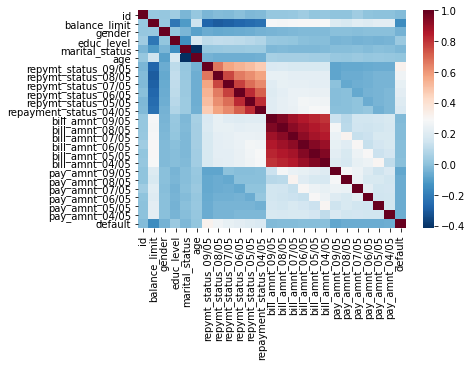

In [12]:
# Explore correlations b/w features using a correlation matrix

# Calculate the correlations between the variables
corr = df.corr()
corr

# Create the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu_r")

# Show the plot
plt.show()

C:\Users\kerme\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


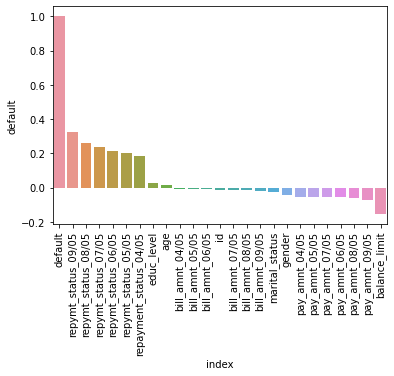

In [13]:
# Lets see which features are most strongly correlated with default.
# We can see that repaymentstatus seems to be strongly correlated with defaulting, and not surprisingly, repayment dates
# nearer in time to default are more strongly correlated. Lets see if the correlations are significant. Pay amount and balance limit
# is negatively correlated.

corr = pd.DataFrame(corr)
corr = corr.loc[:,['default']].reset_index(drop=False).sort_values(['default'],ascending=False)

# Create the barplot
sns.barplot(corr['index'], corr['default'])

# Get the current axes
ax = plt.gca()

# Set the xticklabels
ax.set_xticklabels(corr['index'], rotation=90)

# Show the plot
plt.show()

In [14]:
# Create our independant and dependant variables

X = df[['id', 'balance_limit', 'gender', 'educ_level', 'marital_status', 'age',
       'repymt_status_09/05', 'repymt_status_08/05', 'repymt_status_07/05',
       'repymt_status_06/05', 'repymt_status_05/05', 'repayment_status_04/05',
       'bill_amnt_09/05', 'bill_amnt_08/05', 'bill_amnt_07/05',
       'bill_amnt_06/05', 'bill_amnt_05/05', 'bill_amnt_04/05',
       'pay_amnt_09/05', 'pay_amnt_08/05', 'pay_amnt_07/05', 'pay_amnt_06/05',
       'pay_amnt_05/05', 'pay_amnt_04/05']]
y = df['default']

y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int32

In [15]:
# Random forest classifier algorithm to predict whether a customer defaults on a loan

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [16]:
predictions = rf_model.predict(X_test)
rf_model.classes_
predictions

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Compute the MAE
mae = mean_absolute_error(y_test, predictions)

print(f'MAE: {mae:.3f}')

#The average error between the predictions and actuals in this dataset is 0.18. 
# This means that the model is circa 80% accurate as predicting default. 

MAE: 0.180


In [17]:
rf_model.feature_importances_

array([0.07090425, 0.05141476, 0.01099553, 0.01884825, 0.01268189,
       0.05743154, 0.09822789, 0.03827502, 0.02515038, 0.02318595,
       0.02055016, 0.01937282, 0.05667795, 0.04979578, 0.04801881,
       0.0457279 , 0.04635719, 0.04644948, 0.04877035, 0.04395648,
       0.04315498, 0.04034551, 0.03995831, 0.04374881])

In [18]:
# Find out the most important features

importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f"The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%. ")
    i += 1

The importance of feature 'id' is 7.09%. 
The importance of feature 'balance_limit' is 5.14%. 
The importance of feature 'gender' is 1.1%. 
The importance of feature 'educ_level' is 1.88%. 
The importance of feature 'marital_status' is 1.27%. 
The importance of feature 'age' is 5.74%. 
The importance of feature 'repymt_status_09/05' is 9.82%. 
The importance of feature 'repymt_status_08/05' is 3.83%. 
The importance of feature 'repymt_status_07/05' is 2.52%. 
The importance of feature 'repymt_status_06/05' is 2.32%. 
The importance of feature 'repymt_status_05/05' is 2.06%. 
The importance of feature 'repayment_status_04/05' is 1.94%. 
The importance of feature 'bill_amnt_09/05' is 5.67%. 
The importance of feature 'bill_amnt_08/05' is 4.98%. 
The importance of feature 'bill_amnt_07/05' is 4.8%. 
The importance of feature 'bill_amnt_06/05' is 4.57%. 
The importance of feature 'bill_amnt_05/05' is 4.64%. 
The importance of feature 'bill_amnt_04/05' is 4.64%. 
The importance of feature '

In [19]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score to evaluate the model using 5-fold cross-validation
scores = cross_val_score(rf_model, X, y, cv=5)

# Print the evaluation scores
print(scores)


[0.801      0.80566667 0.81883333 0.82766667 0.81183333]


In [20]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.82


In [21]:
prob = rf_model.predict_proba(X_test)

df['pred_default'] = rf_model.predict_proba(df[X_train.columns])[:,1]
df[['id', 'default', 'pred_default']].sort_values(by=['pred_default'], ascending=False).tail(10)



,id,default,pred_default
12891,12891,0,0.0
12890,12890,0,0.0
27693,27693,0,0.0
17173,17173,0,0.0
17179,17179,0,0.0
12880,12880,0,0.0
20137,20137,0,0.0
3900,3900,0,0.0
12856,12856,0,0.0
19611,19611,0,0.0


In [22]:
def compare_columns(col1, col2):
    # Compare the columns element-wise
    mask = col1.eq(col2)
    # Calculate the percentage of different rows
    percentage = (mask.mean() * 100).round(2)
    return percentage

percentage = compare_columns(df['default'], df['pred_default'])
print(f'Percentage of values which are different in predicted and actual default columns: {percentage}%')

Percentage of values which are different in predicted and actual default columns: 8.46%


In [23]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

model_score = rf_model.score(X_test, y_test)
print(model_score)
cm = metrics.confusion_matrix(y_test, predictions)


0.8203333333333334


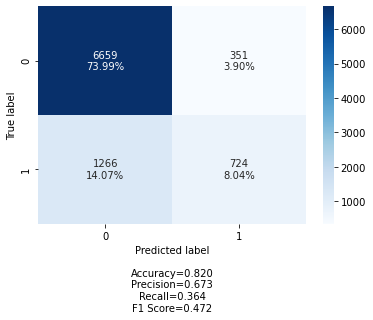

In [24]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
        
make_confusion_matrix(cm)

Precision score (TP / sum(TP+FP)) is sub-optimal. We probably need to change the parameters of the model or use a different model
Accuracy is a good score. The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. Recall score is also too low. The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. Again, the model performs poorly.

In [25]:
# Adding new values to predict probability of default

X.columns



Index(['id', 'balance_limit', 'gender', 'educ_level', 'marital_status', 'age',
       'repymt_status_09/05', 'repymt_status_08/05', 'repymt_status_07/05',
       'repymt_status_06/05', 'repymt_status_05/05', 'repayment_status_04/05',
       'bill_amnt_09/05', 'bill_amnt_08/05', 'bill_amnt_07/05',
       'bill_amnt_06/05', 'bill_amnt_05/05', 'bill_amnt_04/05',
       'pay_amnt_09/05', 'pay_amnt_08/05', 'pay_amnt_07/05', 'pay_amnt_06/05',
       'pay_amnt_05/05', 'pay_amnt_04/05'],
      dtype='object')

In [27]:
id = 30001
balance_limit = 167484
gender= 2
educ_level= 2
marital_status= 2
age= 33
repymt_status_09= 3
repymt_status_08= 1
repymt_status_07= -0.16
repymt_status_06= -0.22
repymt_status_05= -0.22
repayment_status_04=0.18
bill_amnt_09=49611
bill_amnt_08=47611
bill_amnt_07=45611
bill_amnt_06=45311
bill_amnt_05=40311
bill_amnt_04=38871
pay_amnt_09=5663
pay_amnt_08=5663
pay_amnt_07=5225
pay_amnt_06=4826
pay_amnt_05=4799
pay_amnt_04=5215

new_row = np.array([id, 
                    balance_limit,
                    gender,
                    educ_level,
                    marital_status,
                    age,
                    repymt_status_09,
                    repymt_status_08, repymt_status_07,repymt_status_06,repymt_status_05,repayment_status_04,bill_amnt_09,
                    bill_amnt_08,bill_amnt_07,bill_amnt_06,bill_amnt_05,bill_amnt_04,pay_amnt_09,pay_amnt_08,pay_amnt_07,
                    pay_amnt_06,pay_amnt_05,pay_amnt_04])
print(new_row)
new_row = new_row.reshape(1, -1)
y_predict2 = rf_model.predict(new_row)
print(y_predict2)

rf_model.predict_proba(new_row)

# Based on the above features, the model predicts that a 28% chance of credit default.

[ 3.00010e+04  1.67484e+05  2.00000e+00  2.00000e+00  2.00000e+00
  3.30000e+01  3.00000e+00  1.00000e+00 -1.60000e-01 -2.20000e-01
 -2.20000e-01  1.80000e-01  4.96110e+04  4.76110e+04  4.56110e+04
  4.53110e+04  4.03110e+04  3.88710e+04  5.66300e+03  5.66300e+03
  5.22500e+03  4.82600e+03  4.79900e+03  5.21500e+03]
[1]


array([[0.28, 0.72]])

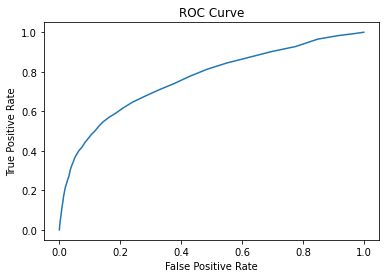

In [31]:
# Create an ROC curve and calc. AUC score to evaluate the models performance

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_probs = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC score
auc = roc_auc_score(y_test, y_probs)

print(auc)

0.763627947153743
